### Student Details

Student Name: Jaydeep Samanta

Student ID: 21115184

# Task 2: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers


In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data from the .csv, using the first row as the headers of the data
data = pd.read_csv('01_heights_weights_genders.csv',header=0)

In [3]:
# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise


<AxesSubplot:xlabel='Height', ylabel='Weight'>

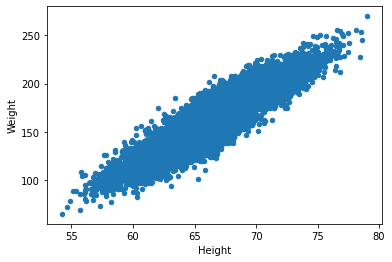

In [4]:
data.plot(kind='scatter',x="Height",y="Weight")

###### Discuss: Do you think there is resonable separation?

The above plot is a scatter plot but there is no way to tell which portion represents male and female, so we can plot this data using different colors

I have used seaborn library to plot the graph to represent Weight and Height distribution among Male and Female.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

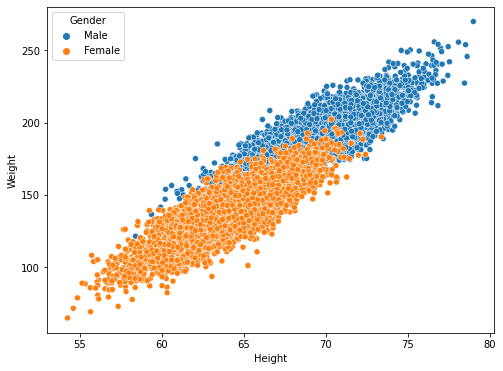

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["Height"],y=data["Weight"],data=data,hue="Gender")

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [6]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting. 

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [7]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.33)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [8]:
from sklearn.naive_bayes import GaussianNB

# Here we are training our model using the training data
gender_model = GaussianNB().fit(X_train, y_train)

### Test the algorithm
Using the test data

In [9]:
y_pred = gender_model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

# Check the accuracy by comparing our known test data gender with the predicted gender
accuracy_score = accuracy_score(y_test, y_pred) 
print (accuracy_score)


0.8866666666666667


### Plot the random samples

Create lots (e.g. 5000) of samples of persons with random weights and height between reasonable ranges. Apply the predict function to predict if these random features pairs are male or female. Plot on a scatter plot 


In [11]:
# Create random Height and Weight
Height = np.random.uniform(50,80,5000)
Weight = np.random.uniform(50,300,5000)

In [12]:
# Create a new data frame and add these Height and Weight parameters in it
new_data = pd.DataFrame()
new_data["Height"] = Height
new_data["Weight"] = Weight
new_data.head()

,Height,Weight
0,71.632867,84.743504
1,59.770621,267.646237
2,53.040695,203.650482
3,71.670918,237.309593
4,79.531971,205.321862


In [13]:
# Using predition model y_pred, predict Genter using new data and add it to the data frame
y_pred = gender_model.predict(new_data)
new_data['Gender'] = y_pred

In [14]:
y_pred

array(['Female', 'Male', 'Female', ..., 'Female', 'Female', 'Female'],
      dtype='<U6')

In [15]:
new_data.head()

,Height,Weight,Gender
0,71.632867,84.743504,Female
1,59.770621,267.646237,Male
2,53.040695,203.650482,Female
3,71.670918,237.309593,Male
4,79.531971,205.321862,Male


<AxesSubplot:xlabel='Height', ylabel='Weight'>

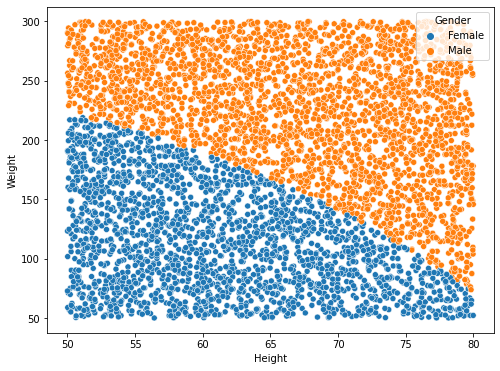

In [16]:
# Plot the random sample
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_data["Height"],y=new_data["Weight"],data=new_data,hue="Gender")